In [1]:
# 每行描述一条广告素材，各字段之间由逗号分隔，顺序依次为“creativeID，adID，camgaignID，advertiserID，appID，appPlatform”。
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import pandas as pd

path = '~/codedata/tpai/pre/'
trainfile = 'train.csv'
train = pd.read_csv(path + trainfile)
ad = pd.read_csv(path + 'ad.csv')

In [2]:
train = pd.merge(train, ad, on='creativeID', how='left')
train.head()

label  clickTime  conversionTime  creativeID   userID  positionID  \
0      0     170000             NaN        3089  2798058         293   
1      0     170000             NaN        1259   463234        6161   
2      0     170000             NaN        4465  1857485        7434   
3      0     170000             NaN        1004  2038823         977   
4      0     170000             NaN        1887  2015141        3688   

   connectionType  telecomsOperator  adID  camgaignID  advertiserID  appID  \
0               1                 1  1321          83            10    434   
1               1                 2  1535         685            80     14   
2               4                 1   147         460             3    465   
3               1                 1   411         564             3    465   
4               1                 1   369         144            84    360   

   appPlatform  
0            1  
1            2  
2            1  
3            1  
4            1

In [3]:
test = {}
def property(var, train):
    sns.distplot(train[var], kde=False)
    fig = plt.figure()
    means = train.groupby(var)['label'].mean()
    plt.scatter(x=means.index, y = means.values)
    sort_means = means.sort_values(ascending = False)
    fig = plt.figure()
    plt.scatter(x = range(0,len(sort_means)), y = sort_means.values)
    return (var, len(train[var].value_counts()), sort_means.max() - sort_means.min(), sort_means.std())

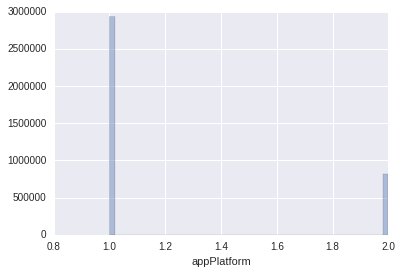

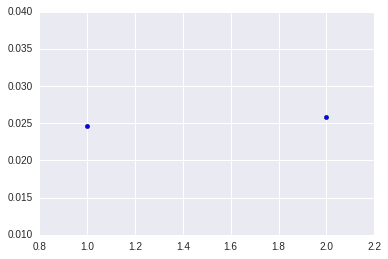

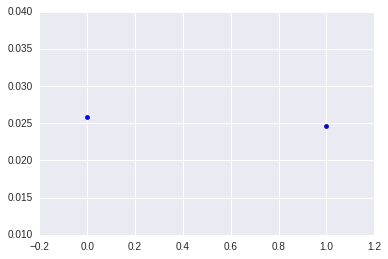

In [4]:
# 存在安卓、苹果、未知
var = 'appPlatform'
test[var] = property(var, train)

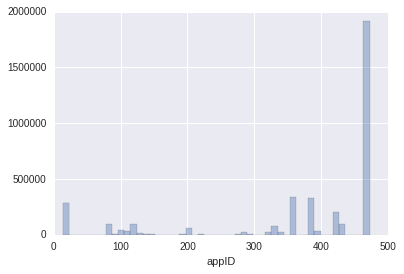

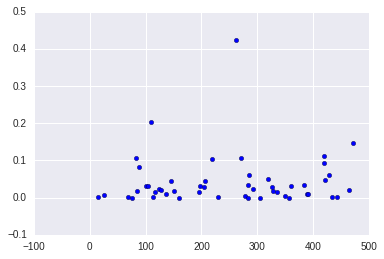

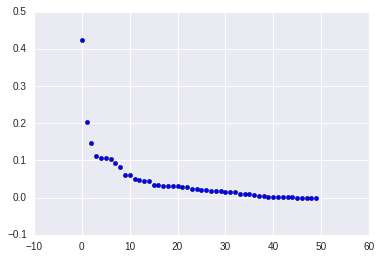

In [5]:
# 广告的appID
var = 'appID'
test[var] = property(var, train)

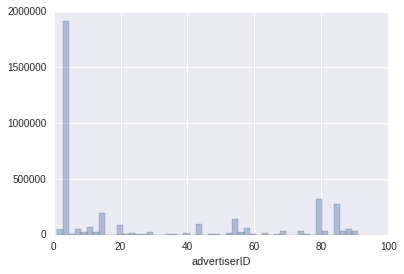

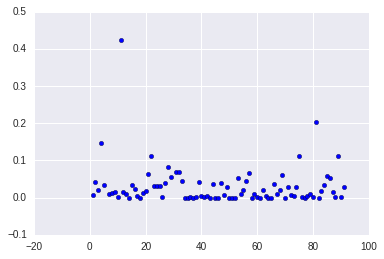

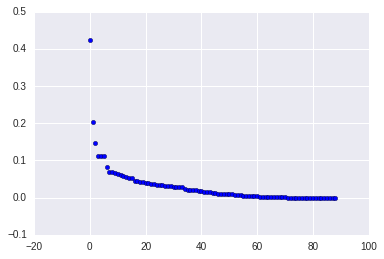

In [6]:
var = 'advertiserID'
test[var] = property(var, train)

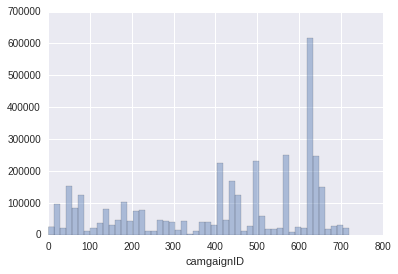

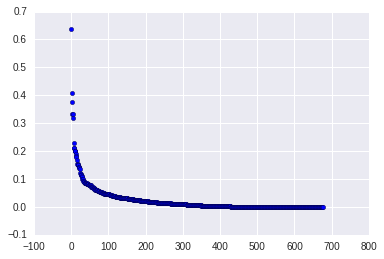

In [7]:
# camgaignID
var = 'camgaignID'
test[var] = property(var, train)

In [8]:
var = 'adID' 
test[var] = property(var, train)

In [9]:
for (k,v) in test.items():
    print v

('advertiserID', 89, 0.42384105960264901, 0.054924098627360564)
('adID', 3447, 1.0, 0.063169867995414214)
('appID', 50, 0.42384105960264901, 0.069580370430679106)
('camgaignID', 677, 0.63636363636363635, 0.050796291439061121)
('appPlatform', 2, 0.0012702159343590154, 0.0008981783007564663)


label      adID  camgaignID  advertiserID     appID  \
label         1.000000  0.013459   -0.004167      0.036255 -0.000401   
adID          0.013459  1.000000    0.308882     -0.048606  0.016105   
camgaignID   -0.004167  0.308882    1.000000     -0.211673  0.175949   
advertiserID  0.036255 -0.048606   -0.211673      1.000000 -0.660020   
appID        -0.000401  0.016105    0.175949     -0.660020  1.000000   
appPlatform   0.003367  0.013106   -0.133096      0.433173 -0.897595   

              appPlatform  
label            0.003367  
adID             0.013106  
camgaignID      -0.133096  
advertiserID     0.433173  
appID           -0.897595  
appPlatform      1.000000

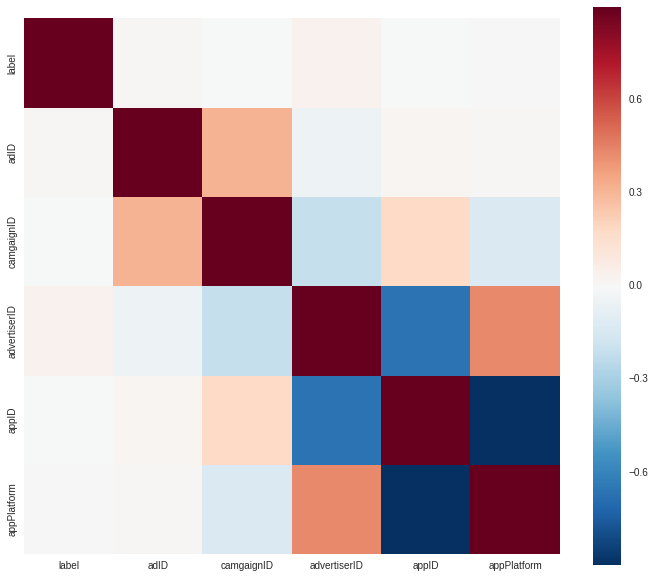

In [10]:
feats = ['label', 'adID', 'camgaignID','advertiserID','appID','appPlatform']
corr = train[feats].corr()
fig = plt.figure(figsize=(12,10))
sns.heatmap(corr, vmax=.8, square=True)
corr